In [26]:
import re
import nltk
import string
import warnings
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import pos_tag, WordNetLemmatizer
from nltk.tokenize import word_tokenize, word_tokenize, RegexpTokenizer

In [27]:
f = open('text2.txt','r',encoding='utf8')
raw = f.read()

In [28]:
# a. count the number of unique tokens in the text.
# for this we, first tokenize the entire text that we read from the text file.
tokens = nltk.word_tokenize(raw)
print(tokens)
unique = set(tokens)
print("Number of unique tokens: ",len(unique))

['My', 'name', 'is', 'Abhinav', '(', '8074831312', ')', '.', 'I', 'was', 'born', 'on', '14', 'January', '2003', '(', '14-01-2003', ')', ',', 'which', 'makes', 'me', '21', 'years', ',', '1', 'month', ',', '2', 'days', 'old', '.', 'I', 'do', "n't", 'remember', 'the', 'exact', 'time', 'I', 'was', 'born', ',', 'else', 'I', 'would', "'ve", 'put', 'that', 'in', 'the', 'text', 'as', 'well', '.', 'I', 'was', 'born', 'in', 'Visakhapatnam', ',', 'Andhra', 'Pradesh', 'and', 'I', 'lived', 'there', 'until', 'I', 'completed', 'my', '10th', 'grade', '.', 'Then', 'my', 'family', 'and', 'I', 'shifted', 'to', 'Hyderabad', 'where', 'I', 'completed', 'my', 'Intermediate', 'and', 'UG', '.', 'Currently', ',', 'I', 'am', 'doing', 'my', 'masters', 'from', 'Christ', '(', 'Deemed', 'to', 'be', 'University', ')', ',', 'Bangalore', '.', 'Coming', 'to', 'what', 'kind', 'of', 'a', 'life', 'I', "'ve", 'led', 'until', 'now', '.', 'Very', 'non-chalant', ',', 'more', 'like', 'your', 'bullied-kid', 'story', 'from', 'the

In [29]:
# b. Count the number of punctuation characters and remove punctuations.
punct_count = sum([1 for char in raw if char in string.punctuation])
print("Number of punctuations: ", punct_count)
text = re.sub(r'[^\W\S]', '', raw)
print("All punctuations have been removed.")

Number of punctuations:  113
All punctuations have been removed.


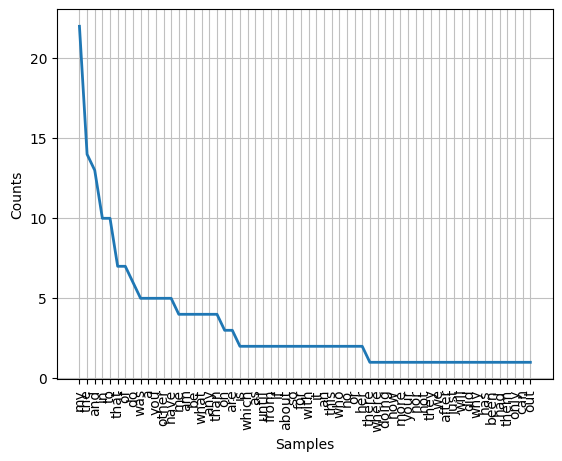

<Axes: xlabel='Samples', ylabel='Counts'>

In [30]:
# c. plot the distribution of stopwords used in the text with a barplot.
stopwords = set(stopwords.words('english'))
w_tokens = tokens
stopwords_dist = nltk.FreqDist(word for word in w_tokens if word in stopwords)
stopwords_dist.plot()

In [31]:
# d. remove all the stopwords from the text.
filtered = [word for word in tokens if word.lower() not in stopwords]
filtered = ' '.join(filtered)
print("Filtered Text: ", filtered)

Filtered Text:  name Abhinav ( 8074831312 ) . born 14 January 2003 ( 14-01-2003 ) , makes 21 years , 1 month , 2 days old . n't remember exact time born , else would 've put text well . born Visakhapatnam , Andhra Pradesh lived completed 10th grade . family shifted Hyderabad completed Intermediate UG . Currently , masters Christ ( Deemed University ) , Bangalore . Coming kind life 've led . non-chalant , like bullied-kid story american high school movies . know know . 're wondering end things , i.e . * hush low voice * psst .. psst .. relationships ! . n't anyone , interested anyone . reasons , willing elaborate . academics fine . pretty well skill level . Pass subjects make sure survive . parents absolutely fine . n't issues attitude towards marks cause know skills . family , n't parents grandmother ( naani ) mum 's big brother . 'm kind anomaly family . last second boy family , father 's side family 're talking . right , cousin happens fist girl family genereation . ( know mean ) . l

POS Tags:  [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('Abhinav', 'NNP'), ('(', '('), ('8074831312', 'CD'), (')', ')'), ('.', '.'), ('I', 'PRP'), ('was', 'VBD'), ('born', 'VBN'), ('on', 'IN'), ('14', 'CD'), ('January', 'NNP'), ('2003', 'CD'), ('(', '('), ('14-01-2003', 'JJ'), (')', ')'), (',', ','), ('which', 'WDT'), ('makes', 'VBZ'), ('me', 'PRP'), ('21', 'CD'), ('years', 'NNS'), (',', ','), ('1', 'CD'), ('month', 'NN'), (',', ','), ('2', 'CD'), ('days', 'NNS'), ('old', 'JJ'), ('.', '.'), ('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('remember', 'VB'), ('the', 'DT'), ('exact', 'JJ'), ('time', 'NN'), ('I', 'PRP'), ('was', 'VBD'), ('born', 'VBN'), (',', ','), ('else', 'RB'), ('I', 'PRP'), ('would', 'MD'), ("'ve", 'VBP'), ('put', 'VB'), ('that', 'DT'), ('in', 'IN'), ('the', 'DT'), ('text', 'NN'), ('as', 'RB'), ('well', 'RB'), ('.', '.'), ('I', 'PRP'), ('was', 'VBD'), ('born', 'VBN'), ('in', 'IN'), ('Visakhapatnam', 'NNP'), (',', ','), ('Andhra', 'NNP'), ('Pradesh', 'NNP'), ('and', 'C

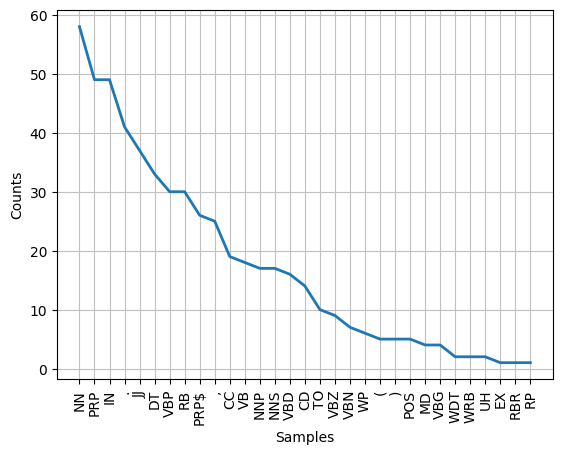

<Axes: xlabel='Samples', ylabel='Counts'>

In [32]:
# e. Plot the distribution of each POS tag using a barplot.
pos_tags = pos_tag(tokens)
print("POS Tags: ", pos_tags)
pos_dist = nltk.FreqDist(tag for (word, tag) in pos_tags)
pos_dist.plot()

In [33]:
# f. determin the number of unique lemma available in the text.
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(word) for word in tokens]
unique_lemmas = set(lemmas)
print("Lemmas: ", lemmas)
print("Number of unique lemmas: ", len(unique_lemmas))

Lemmas:  ['My', 'name', 'is', 'Abhinav', '(', '8074831312', ')', '.', 'I', 'wa', 'born', 'on', '14', 'January', '2003', '(', '14-01-2003', ')', ',', 'which', 'make', 'me', '21', 'year', ',', '1', 'month', ',', '2', 'day', 'old', '.', 'I', 'do', "n't", 'remember', 'the', 'exact', 'time', 'I', 'wa', 'born', ',', 'else', 'I', 'would', "'ve", 'put', 'that', 'in', 'the', 'text', 'a', 'well', '.', 'I', 'wa', 'born', 'in', 'Visakhapatnam', ',', 'Andhra', 'Pradesh', 'and', 'I', 'lived', 'there', 'until', 'I', 'completed', 'my', '10th', 'grade', '.', 'Then', 'my', 'family', 'and', 'I', 'shifted', 'to', 'Hyderabad', 'where', 'I', 'completed', 'my', 'Intermediate', 'and', 'UG', '.', 'Currently', ',', 'I', 'am', 'doing', 'my', 'master', 'from', 'Christ', '(', 'Deemed', 'to', 'be', 'University', ')', ',', 'Bangalore', '.', 'Coming', 'to', 'what', 'kind', 'of', 'a', 'life', 'I', "'ve", 'led', 'until', 'now', '.', 'Very', 'non-chalant', ',', 'more', 'like', 'your', 'bullied-kid', 'story', 'from', 'th

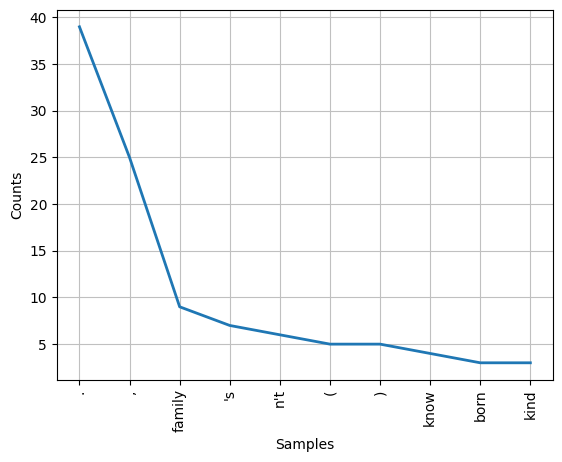

<Axes: xlabel='Samples', ylabel='Counts'>

In [34]:
# g. plot the frequency distribution of words in the text. Display only the top tokens in the chart.
splits = filtered.split()
fdist = FreqDist(splits)
fdist.plot(10)

In [35]:
# h. find the number of unique bigrams, trigrams, and quadgrams (n=4) in the corpus.
bigrams = nltk.ngrams(filtered.split(),2)
trigrams = nltk.ngrams(filtered.split(),3)
quadgrams = nltk.ngrams(filtered.split(),4)
print("Number of unique bigrams: ", len(set(bigrams)))
print("Number of unique trigrams: ", len(set(trigrams)))
print("Number of unique quadgrams: ", len(set(quadgrams)))

Number of unique bigrams:  281
Number of unique trigrams:  294
Number of unique quadgrams:  293


In [36]:
# i. find all dates and convert them to the DD-MM-YYYY format.
dates = re.findall(r'\b\d{1,2}[-/]\d{1,2}[-/]\d{2,4}\b', raw)
formatted_dates = [datetime.strptime(date, '%d-%m-%Y').strftime('%d-%m-%Y') for date in dates]
print("Formatted dates: ", formatted_dates)

Formatted dates:  ['14-01-2003', '13-01-2004', '16-05-2003', '19-12-2001', '06-03-2002']


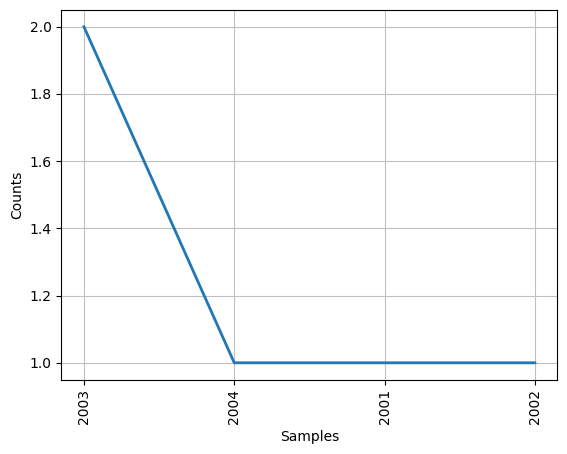

<Axes: xlabel='Samples', ylabel='Counts'>

In [37]:
# j. plot the distribution of the different values of year occuring in the text.
years = [int(re.findall(r'\b\d{4}\b', date)[0]) for date in dates]
year_dist = nltk.FreqDist(years)
year_dist.plot()

In [38]:
# k. determine whther the text contains any phone numbers in it.
# Ensure that the phone numbers are valid if any are found.
# if the phone is an invalid phone number, remove it from the text.
ph_nos = re.findall(r'\b(?:\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}\b)', raw)
print("Phone Numbers: ", ph_nos)

Phone Numbers:  ['8074831312', '9441019787', '9000721122', '6303649827']
